In this example, let us address clustering. Unsupervised learning or clustering consists in finding hidden structures in unlabelled data. We are going to use k-means clustering. 

This dataset is labelled, nevertheless, we are going to compare the solution obtained with k-means clustering and the labelled data.


In [29]:
%matplotlib inline

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#Lebron James data
#PlayerID is the number in the nba.stats site

shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR'\
                'AMS=2014-15&ContextFilter=&ContextMeasure=FGA&DateFrom=&D'\
                'ateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Loca'\
                'tion=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&'\
                'PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID=2544&Plu'\
                'sMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&Seas'\
                'onSegment=&SeasonType=Regular+Season&TeamID=0&VsConferenc'\
                'e=&VsDivision=&mode=Advanced&showDetails=0&showShots=1&sh'\
                'owZones=0'  

response = requests.get(shot_chart_url)
headers = response.json()['resultSets'][0]['headers']
shots = response.json()['resultSets'][0]['rowSet']

shot_df = pd.DataFrame(data=shots, columns=headers)

stmp=pd.DataFrame()
stmp['LOC_X']=shot_df.LOC_X
stmp['LOC_Y']=shot_df.LOC_Y

To use k-means with **scipy** we need to convert the **pandas** `DataFrame` into a **numpy** array.

In [36]:
stmp1=stmp.as_matrix(columns=None)
data_s1=stmp1.astype(float)

Now we can compute the clusters (centroids and data labelling).  Notice that we are going to use 6 centroids.

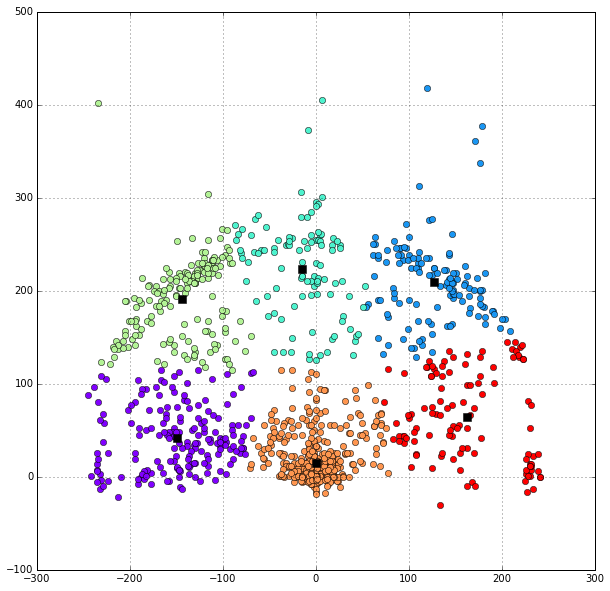

In [37]:
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq,whiten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize=(10,10))

cd=6

centroids,_ = kmeans(data_s1,cd)

idx,_ = vq(data_s1,centroids)

#colors = cm.rainbow(np.linspace(0, 1, cd))
colors=iter(cm.rainbow(np.linspace(0,1,cd)))

for tt in range(cd):
    
    c=next(colors)
    
    #plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o')
    plt.plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o', c=c)
    

plt.plot(centroids[:,0],centroids[:,1],'sk',markersize=8)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.grid()
plt.show()

At this point, we labelled the data using k-means clustering (unsupervised training). 

Let us compare the data clustered using k-means with the original labelled data. The original data is labelled by SHOT_ZONE_AREA.

In [39]:
shot_df.groupby('SHOT_ZONE_AREA').count().GRID_TYPE

SHOT_ZONE_AREA
Back Court(BC)             3
Center(C)                670
Left Side Center(LC)     177
Left Side(L)             181
Right Side Center(RC)    149
Right Side(R)             99
Name: GRID_TYPE, dtype: int64

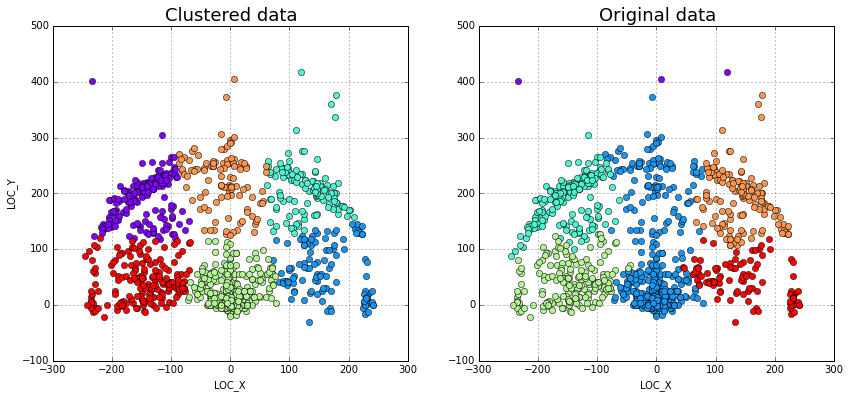

In [42]:
plt.figure(figsize=(14, 6))

#first plot
plt.subplot(121)

cd=6
centroids,_ = kmeans(data_s1,cd)
idx,_ = vq(data_s1,centroids)

colors=iter(cm.rainbow(np.linspace(0,1,cd)))

for tt in range(cd):
    c=next(colors)
    plt.plot(data_s1[idx== tt,0],data_s1[idx== tt,1],'o', c=c)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

plt.grid()
plt.title('Clustered data',fontsize=18)


#second plot
plt.subplot(122)

li = ['Back Court(BC)','Center(C)','Left Side Center(LC)','Left Side(L)','Right Side Center(RC)','Right Side(R)']

sets=6
colors=iter(cm.rainbow(np.linspace(0,1,sets)))

for s,c in zip(li,colors):
    plt.plot(shot_df.LOC_X[shot_df.SHOT_ZONE_AREA == s],shot_df.LOC_Y[shot_df.SHOT_ZONE_AREA == s],'o',color=c)

plt.xlim(-300,300)
plt.ylim(-100,500)

plt.xlabel('LOC_X')
#plt.ylabel('LOC_Y')

plt.grid()
plt.title('Original data',fontsize=18)

plt.show()

As we can see, the k-means algorithm did a pretty good job as the zones labelled are very similar to those used in the nba to classify the shot zone area or `SHOT_ZONE_AREA` in the scrapped dataset.